In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import dataproject_functions1
df1= dataproject_functions1.load_and_process("../../data/raw/Dataset_irobinson.csv.csv")
df1.head(5)


,id,turns,victory_status,winner,time,white_rating,black_rating,moves,opening_ply,move_name_and_eco
0,Z1M9z44Z,1,resign,white,10+0,1670,1175,e4,1,King's Pawn(B00)
1,3K5kYPO8,1,resign,black,10+0,1464,1355,g3,1,Hungarian Opening(A00)
2,3NQKJmJ5,1,outoftime,white,5+15,2404,1616,e4,1,King's Pawn(B00)
3,01dkNQ2O,1,outoftime,white,20+10,2438,1666,e4,1,King's Pawn(B00)
4,LAFV9u5Q,1,outoftime,white,20+10,2438,1885,e4,1,King's Pawn(B00)


In [2]:
df1['opening_ply'].max()

28

In [3]:
#breakdown of key information regarding the numerical data
df1.describe()

,turns,white_rating,black_rating,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [4]:
#correlations of numerical data
df1.corr()

,turns,white_rating,black_rating,opening_ply
turns,1.000000,0.129753,0.160467,0.055999
white_rating,0.129753,1.000000,0.634171,0.277379
black_rating,0.160467,0.634171,1.000000,0.255396
opening_ply,0.055999,0.277379,0.255396,1.000000


<AxesSubplot:>

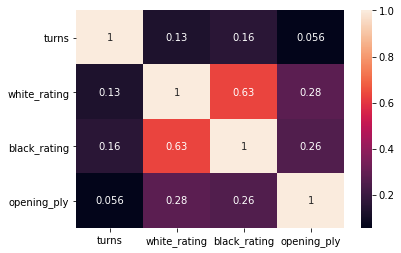

In [5]:
#Are any correlations between opening ply and colour?
sns.heatmap(df1.corr(),annot=True)

It appears there is little correlation between the two. 

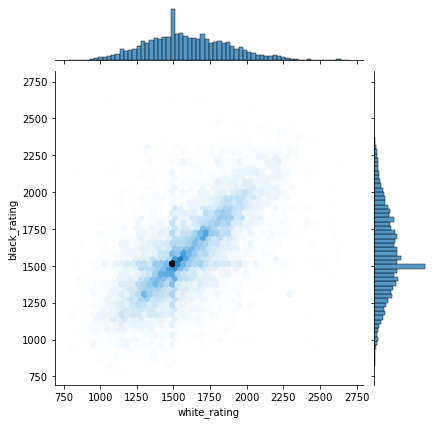

In [6]:
#comparing player ratings
sns.jointplot(x='white_rating',y='black_rating',data=df1,kind='hex')
plt.savefig('rating_jointplot.png')

Player ratings roughly average out at around 1500, which makes sense given that that is the default player rank when an account is created on Lichess

Text(0.5, 1.0, 'Wins and Draws by Colour')

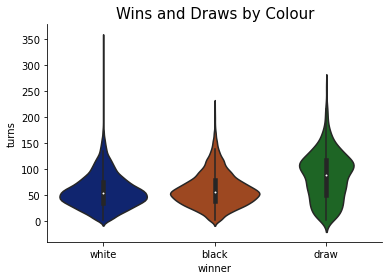

In [7]:
#who were the winners

sns.violinplot(data=df1,x='winner',y='turns',palette='dark')
sns.despine()
plt.title('Wins and Draws by Colour',size=15)

In the matches, it appears that the distribution of wins per colour is equal.

In [8]:
#what are the most popular openings?

df_top_ecos=df1['move_name_and_eco'].value_counts().head(25).to_frame()
df_top_ecos.columns = ['value_counts']
df_top_ecos_fixed=df_top_ecos.reset_index()
df_top_ecos_fixed.rename(columns={'index':'Opening Name'})

,Opening Name,value_counts
0,Van't Kruijs Opening(A00),368
1,Sicilian Defense: Bowdler Attack(B20),296
2,French Defense: Knight Variation(C00),271
3,Scandinavian Defense: Mieses-Kotroc Variation(...,259
4,Queen's Pawn Game: Mason Attack(D00),232
5,Scandinavian Defense(B01),223
6,Horwitz Defense(A40),209
7,Philidor Defense #3(C41),198
8,Philidor Defense #2(C41),193
9,Indian Game(A45),181


Text(0.5, 0, 'Counts')

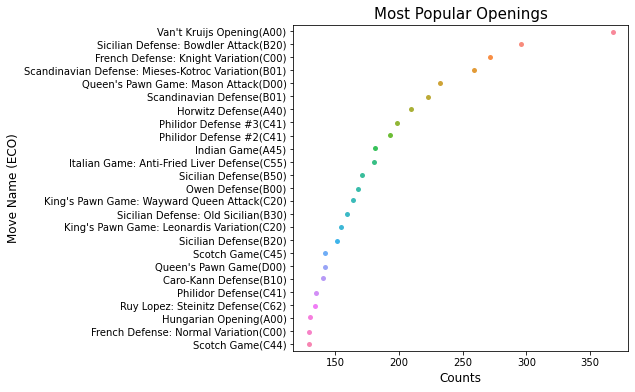

In [9]:
#what are the most popular openings?
plt.figure(figsize=(6,6))
sns.stripplot(y='index',x='value_counts',data=df_top_ecos_fixed)
plt.title('Most Popular Openings',size=15)
plt.ylabel('Move Name (ECO)',size=12)
plt.xlabel('Counts',size=12)

In [10]:
#what are the most frequently used openings by colour?
df_high_frequencies=(df1.groupby('winner')['move_name_and_eco']
                     .value_counts()
                     .sort_values(ascending=False)
                     .head(25)
                     .to_frame()
    
                     )
df_high_frequencies.columns = ['value_counts']
df_most_frequent= df_high_frequencies.reset_index()          
df_most_frequent

,winner,move_name_and_eco,value_counts
0,black,Van't Kruijs Opening(A00),226
1,white,Scandinavian Defense: Mieses-Kotroc Variation(...,164
2,black,Sicilian Defense: Bowdler Attack(B20),164
3,white,French Defense: Knight Variation(C00),135
4,white,Philidor Defense #3(C41),127
5,white,Van't Kruijs Opening(A00),126
6,black,Scandinavian Defense(B01),123
7,black,French Defense: Knight Variation(C00),121
8,white,Sicilian Defense: Bowdler Attack(B20),119
9,white,Queen's Pawn Game: Mason Attack(D00),116


<Figure size 432x288 with 0 Axes>

<Figure size 576x576 with 0 Axes>

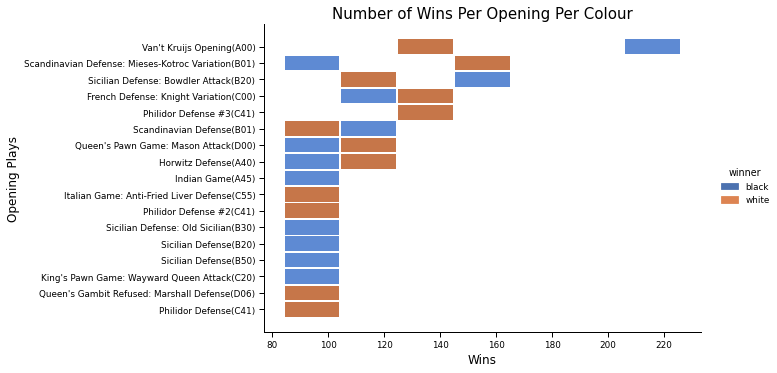

In [11]:
#sort most popular opening ECOs by colour

df_high_frequencies=(df1.groupby('winner')['move_name_and_eco']
                     .value_counts()
                     .sort_values(ascending=False)
                     .head(25)
                     .to_frame()
    
                     )
df_high_frequencies.columns = ['value_counts']
df_most_frequent= df_high_frequencies.reset_index()          

#plotting number of wins per strategy per side 
sns.set_context('paper')
sns.despine()
plt.figure(figsize=(8,8))
sns.displot(y='move_name_and_eco',x='value_counts',data=df_most_frequent,hue='winner',aspect=2,edgecolor='w',palette='deep')
plt.ylabel('Opening Plays',size=12)
plt.xlabel('Wins',size=12)
plt.title('Number of Wins Per Opening Per Colour',size=15)
plt.savefig('wins_per_opening_per_colour')

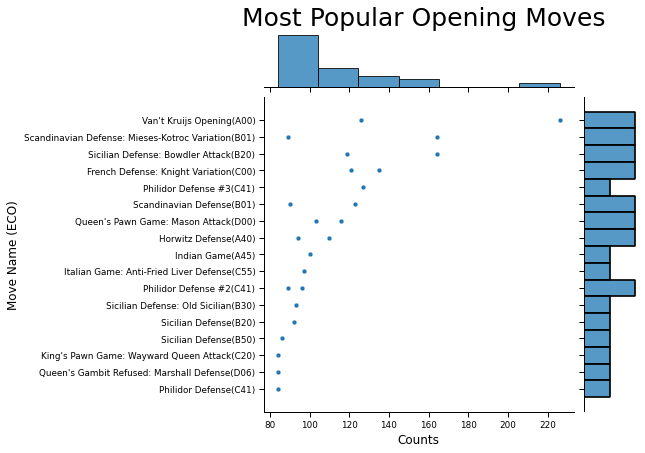

In [12]:

df_openings=sns.jointplot(x='value_counts',y='move_name_and_eco',data=df_most_frequent,kind='scatter')
plt.title('Most Popular Opening Moves',x=-3,y=1.21,size=25)
df_openings.set_axis_labels('Counts','Move Name (ECO)',size=12)


In [13]:
#eliminate the seconds in the 'time' column:

df_matchtime= df1.iloc[:,]

for i in range(len(df1)):
    df1.iloc[i,4] = df1.iloc[i,4].split('+')[0]
df_matchtime.sort_values(['time'],ascending=False)

,id,turns,victory_status,winner,time,white_rating,black_rating,moves,opening_ply,move_name_and_eco
4657,hgwn2QJz,35,mate,white,90,2291,1576,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 d3 Bc5 O-O O-O Bx...,9,Ruy Lopez: Morphy Defense | Anderssen Variati...
17286,4moLxU4x,98,mate,black,90,1172,1199,d4 d6 Nf3 e5 c4 Nc6 Nc3 exd4 Nb5 Bf5 Nbxd4 Nxd...,4,Zukertort Opening: Vos Gambit(A04)
4317,gxG8xX0g,34,resign,white,90,1808,1619,e4 e5 Nf3 Nc6 Bc4 Nf6 d3 d5 exd5 Nxd5 Nc3 Bb4 ...,7,Italian Game: Two Knights Defense | Modern Bi...
9503,cukIDOqv,53,mate,white,90,1408,1432,e3 e5 b3 d5 Bb2 Nc6 g3 f5 Qh5+ g6 Qe2 Nf6 Nf3 ...,1,Van't Kruijs Opening(A00)
9657,G8Yeh5BY,54,mate,black,90,1181,1310,d4 d5 c4 c6 Nc3 dxc4 e3 e6 Bxc4 Bb4 Bd2 Bxc3 B...,6,Slav Defense #3(D10)
...,...,...,...,...,...,...,...,...,...,...
3769,CIUu7318,31,resign,black,0,1158,1324,e4 e5 Nf3 Nc6 d4 exd4 Nxd4 Nf6 Nxc6 bxc6 Bg5 B...,8,Scotch Game: Schmidt Variation(C45)
2128,yRIvgIZX,23,resign,white,0,798,1157,e4 g6 Nf3 Bg7 Nc3 c5 b3 Nc6 Bb2 e6 Bc4 Nge7 d4...,2,Modern Defense(B06)
122,RuHlwQEe,2,outoftime,black,0,2073,2257,e4 d5,2,Scandinavian Defense(B01)
2862,rxvCHIAX,27,resign,white,0,1500,1271,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Nxd5 Nxf7 Kx...,11,Italian Game: Two Knights Defense | Fried Liv...


In [14]:
#make time numeric and merge with df1
df_matchtime_fixed=pd.to_numeric(df_matchtime['time'])
df1_notime= df1.drop(columns='time')
df2=pd.concat([df1_notime,df_matchtime_fixed],axis=1)
df2

,id,turns,victory_status,winner,white_rating,black_rating,moves,opening_ply,move_name_and_eco,time
0,Z1M9z44Z,1,resign,white,1670,1175,e4,1,King's Pawn(B00),10
1,3K5kYPO8,1,resign,black,1464,1355,g3,1,Hungarian Opening(A00),10
2,3NQKJmJ5,1,outoftime,white,2404,1616,e4,1,King's Pawn(B00),5
3,01dkNQ2O,1,outoftime,white,2438,1666,e4,1,King's Pawn(B00),20
4,LAFV9u5Q,1,outoftime,white,2438,1885,e4,1,King's Pawn(B00),20
...,...,...,...,...,...,...,...,...,...,...
20053,5ZjOnwjl,226,draw,draw,1817,1907,e4 e6 Nf3 d5 exd5 exd5 d4 Nf6 Bg5 Be7 Nc3 Be6 ...,3,French Defense: Knight Variation(C00),10
20054,vQq60Hur,255,draw,draw,1585,1448,e4 e6 Nc3 d5 exd5 exd5 d4 Nf6 Bf4 Be7 Nf3 O-O ...,3,French Defense: Queen's Knight(C00),7
20055,cZiGllu7,259,draw,draw,1441,1461,d4 d5 c4 c6 Nc3 Nf6 Bg5 Nbd7 Qc2 Qb6 e3 h6 Bf4...,5,Slav Defense #2(D10),15
20056,pN0ioHNr,349,outoftime,white,2194,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,13,Queen's Gambit Declined: Hastings Variation(D30),10


In [15]:
#observe correlations with time
df2.corr()

,turns,white_rating,black_rating,opening_ply,time
turns,1.000000,0.129753,0.160467,0.055999,-0.059298
white_rating,0.129753,1.000000,0.634171,0.277379,-0.070330
black_rating,0.160467,0.634171,1.000000,0.255396,-0.077317
opening_ply,0.055999,0.277379,0.255396,1.000000,-0.034691
time,-0.059298,-0.070330,-0.077317,-0.034691,1.000000


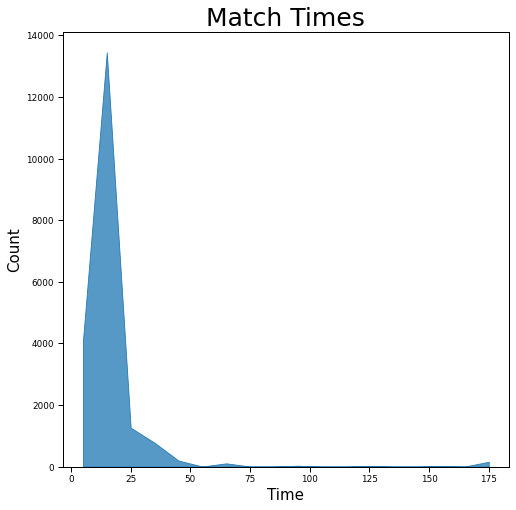

In [16]:
plt.figure(figsize=(8,8))
sns.histplot(x='time',data=df2,element='poly',binwidth=10)
plt.title('Match Times',size=25)
plt.xlabel('Time',size=15)
plt.ylabel('Count',size=15)
plt.savefig('match_times')

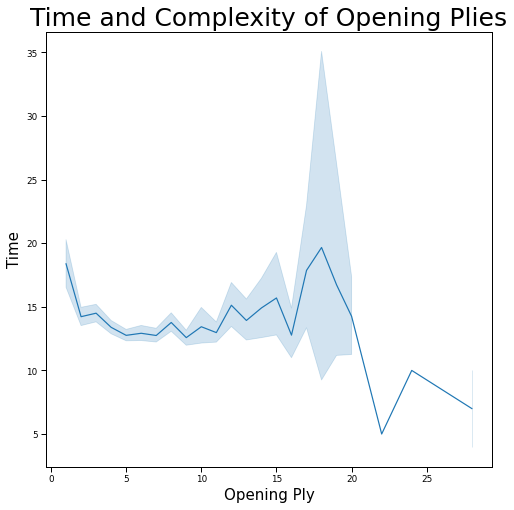

In [17]:
#correlation of time with opening ply
plt.figure(figsize=(8,8))
sns.lineplot(y='time',x='opening_ply',data=df2,palette='rainbow')
plt.title('Time and Complexity of Opening Plies',size=25)
plt.xlabel('Opening Ply',size=15)
plt.ylabel('Time',size=15)
plt.savefig('time_and_ply_2')

It appears there  is little correlation between the amount of time a player has and their choice of opening ply. 